# Time Series analysis on the data International Airline Passengers from 1940 to 1960.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.shape

(144, 2)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143],
 [Text(0, 0, '1949-01'),
  Text(1, 0, '1949-02'),
  Text(2, 0, '1949-03'),
  Text(3, 0, '1949-04'),
 

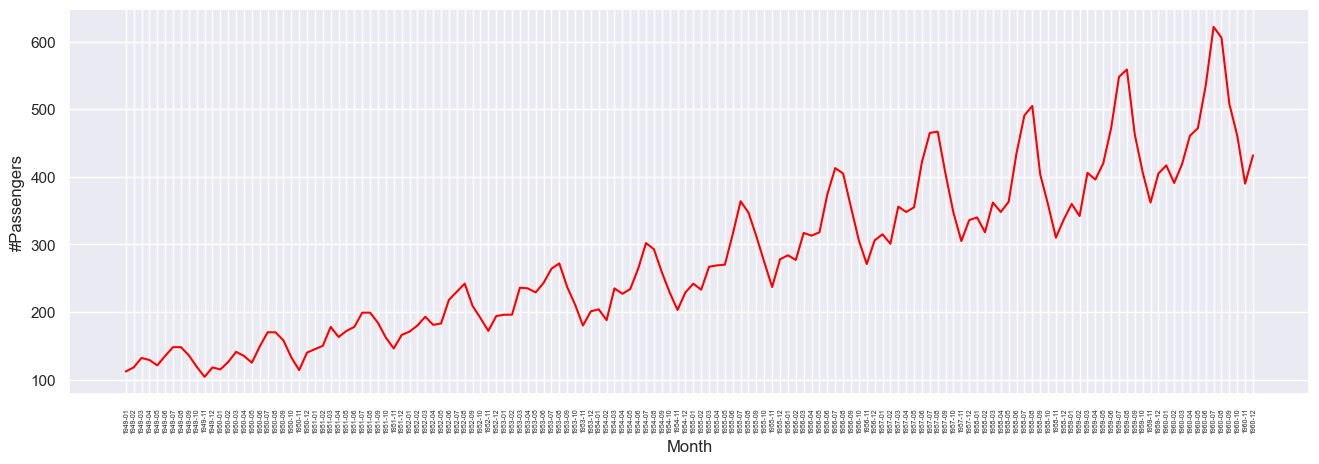

In [19]:
# # Plot the data to see the trends and seasonality
# plt.figure(figsize=(10,6))
# plt.plot(df['Month'],df['#Passengers'])
# plt.xlabel("Months")
# plt.ylabel('No: of Passengers')
# plt.title("Air Passengers Data")
# plt.show()

# Plot the data to see the trends and seasonality with seaborn
sns.set(rc={"figure.figsize":(16,5)})
sns.lineplot(x='Month',y="#Passengers",color='red',data=df)
plt.xticks(rotation=90,fontsize=5)

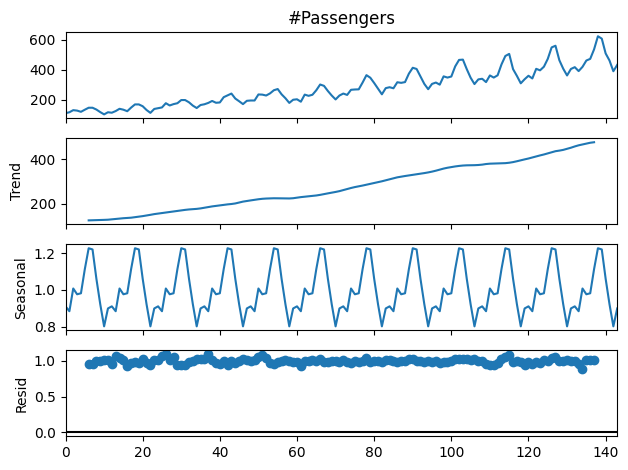

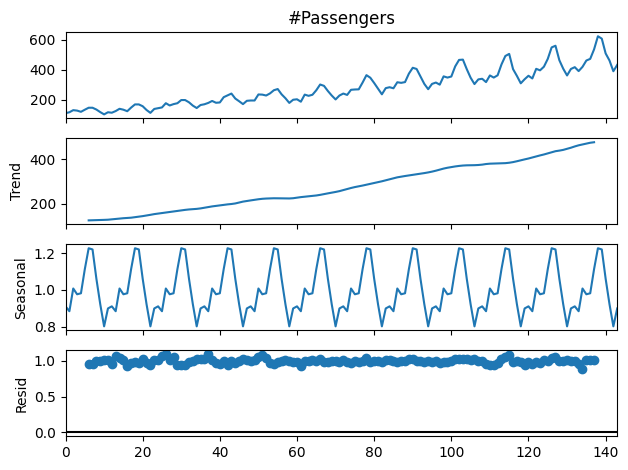

In [11]:
# Decompose the data into trends, seasonality,and residuals
decompose = seasonal_decompose(df["#Passengers"],model="multiplicative",period=12)
decompose.plot()

In [12]:
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

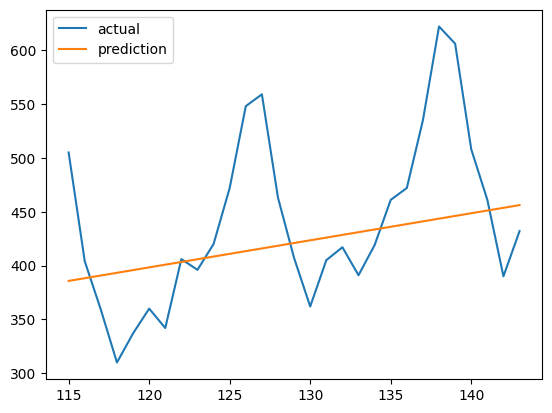

In [15]:
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# fit a simple linear regression model on the training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train.index.values.reshape(-1, 1), train["#Passengers"])

# Make predictions on the testing dataset
prediction = model.predict(test.index.values.reshape(-1, 1))

# Plot the model
plt.plot(test.index, test["#Passengers"], label='actual')
plt.plot(test.index, prediction, label='prediction')
plt.legend()
plt.show()